In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
flight = sns.load_dataset('flights')

In [4]:
# First 5 rows
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
# Checking shape
flight.shape

(144, 3)

In [6]:
# Checking column names
flight.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [7]:
# File summary
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [8]:
# Check description
flight.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [9]:
# Check missing value
flight.isna().sum()

year          0
month         0
passengers    0
dtype: int64

In [11]:
# check duplicates
flight.duplicated().sum()

0

In [24]:
# Last 5 rows
flight.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


# EDA

### 1. Finding unique year values

In [12]:
flight.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [18]:
year = flight.groupby('year').passengers.sum()
year

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

In [21]:
flight_year = year.to_frame().reset_index()
flight_year

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


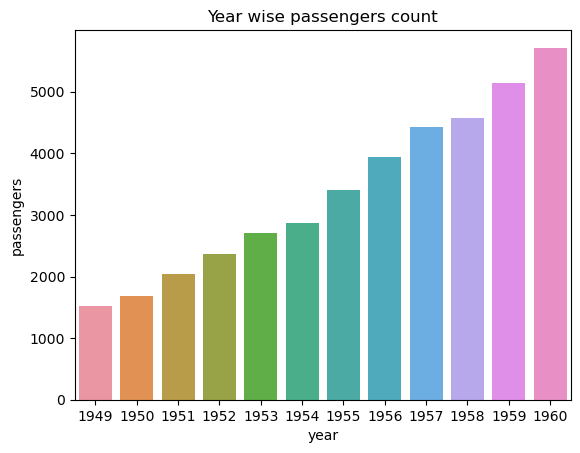

In [23]:
sns.barplot(data=flight_year,x='year',y='passengers')
plt.title('Year wise passengers count')
plt.show()

In The above year 1949 has less passengers and year 1960 have highest passengers. Relation between year to number of passengers is increasing year by year.

In [25]:
# Finding the maximum passenger count in year
flight.groupby('year').passengers.sum().max()

5714

In [26]:
# Minimum number passengers count in years
flight.groupby('year').passengers.sum().min()

1520

In [27]:
# Average number of paasengers per year is
flight.groupby('year').passengers.sum().mean()

3363.5833333333335

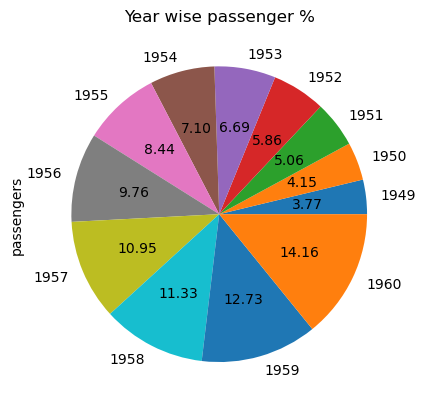

In [40]:
flight.groupby('year').passengers.sum().plot(kind='pie',autopct='%1.2f')
plt.title('Year wise passenger %')
plt.show()

### Month wise passenger

In [30]:
flight_month = flight.groupby('month').passengers.sum().to_frame().reset_index()
flight_month

,month,passengers
0,Jan,2901
1,Feb,2820
2,Mar,3242
3,Apr,3205
4,May,3262
5,Jun,3740
6,Jul,4216
7,Aug,4213
8,Sep,3629
9,Oct,3199


In [31]:
# Finding maximum passengers in which month
flight.groupby('month').passengers.sum().max()

4216

In [32]:
# Minimum number of passengers 
flight.groupby('month').passengers.sum().min()

2794

In [33]:
# Average number of passangers from month
flight.groupby('month').passengers.sum().mean()

3363.5833333333335

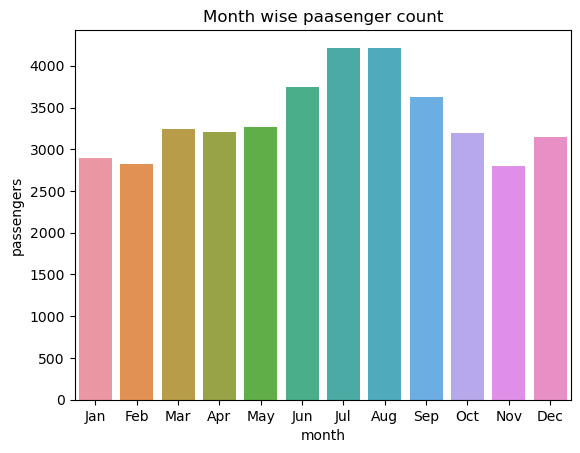

In [36]:
sns.barplot(data=flight_month,x='month',y='passengers')
plt.title('Month wise paasenger count')
plt.show()

In the above we see that july month has highest number of passengers and feb month has lowest month of passengers.

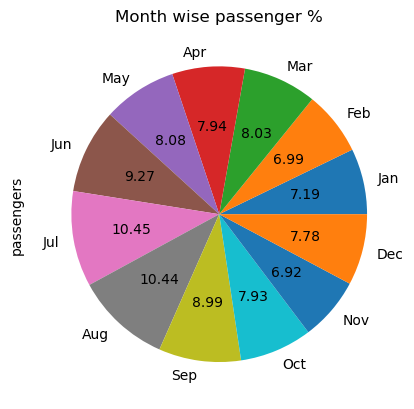

In [39]:
flight.groupby('month').passengers.sum().plot(kind='pie',autopct='%1.2f')
plt.title('Month wise passenger %')
plt.show()

In [64]:
flight_min_pass = flight.groupby('month')[['year','passengers']].min()
flight_min_pass.style.background_gradient('Reds')

,year,passengers
month,,
Jan,1949,112
Feb,1949,118
Mar,1949,132
Apr,1949,129
May,1949,121
Jun,1949,135
Jul,1949,148
Aug,1949,148
Sep,1949,136


In [65]:
flight_max_pass = flight.groupby('month')[['year','passengers']].max()
flight_max_pass.style.background_gradient('Greens')

,year,passengers
month,,
Jan,1960,417
Feb,1960,391
Mar,1960,419
Apr,1960,461
May,1960,472
Jun,1960,535
Jul,1960,622
Aug,1960,606
Sep,1960,508
